<a href="https://colab.research.google.com/github/Sachinsachin21/Machine_learning/blob/main/logistic_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
p = pd.read_csv("carzz.csv")
p.head()

,Name,MPG,Cylinders,Displacement,HorsePower,Weight,Acceleration,Model_Year,Origin,High Speed Car
0,Amc Ambassador Brougham,13.0,8.0,360.0,175.0,3821.0,11.0,73.0,USA,Super Car
1,Amc Ambassador Dpl,15.0,8.0,390.0,190.0,3850.0,8.5,70.0,USA,Super Car
2,Amc Ambassador Sst,17.0,8.0,304.0,150.0,3672.0,11.5,72.0,USA,Normal Car
3,Amc Concord,24.3,4.0,151.0,90.0,3003.0,20.1,80.0,USA,Normal Car
4,Amc Concord D/L,18.1,6.0,258.0,120.0,3410.0,15.1,78.0,USA,Normal Car


In [3]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            301 non-null    object 
 1   MPG             300 non-null    float64
 2   Cylinders       300 non-null    float64
 3   Displacement    300 non-null    float64
 4   HorsePower      300 non-null    float64
 5   Weight          300 non-null    float64
 6   Acceleration    300 non-null    float64
 7   Model_Year      300 non-null    float64
 8   Origin          300 non-null    object 
 9   High Speed Car  301 non-null    object 
dtypes: float64(7), object(3)
memory usage: 23.7+ KB


In [4]:
p.rename(columns={'High Speed Car':'car_type'},inplace=True)

In [5]:
df= p.drop(p.tail(2).index,inplace = True)

In [6]:
p.tail()

,Name,MPG,Cylinders,Displacement,HorsePower,Weight,Acceleration,Model_Year,Origin,car_type
295,Vw Rabbit Custom Diesel,43.1,4.0,90.0,48.0,1985.0,21.5,78.0,Europe,Normal Car
296,Vw Rabbit L,36.0,4.0,105.0,74.0,1980.0,15.3,82.0,Europe,Normal Car
297,Vw Scirocco,31.5,4.0,89.0,71.0,1990.0,14.9,78.0,Europe,Normal Car
298,Vw Super Beetle,26.0,4.0,97.0,46.0,1950.0,21.0,73.0,Europe,Normal Car
299,Vw Type 3,23.0,4.0,97.0,54.0,2254.0,23.5,72.0,Europe,Normal Car


In [7]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          300 non-null    object 
 1   MPG           300 non-null    float64
 2   Cylinders     300 non-null    float64
 3   Displacement  300 non-null    float64
 4   HorsePower    300 non-null    float64
 5   Weight        300 non-null    float64
 6   Acceleration  300 non-null    float64
 7   Model_Year    300 non-null    float64
 8   Origin        300 non-null    object 
 9   car_type      300 non-null    object 
dtypes: float64(7), object(3)
memory usage: 23.6+ KB


In [8]:
p.describe()

,MPG,Cylinders,Displacement,HorsePower,Weight,Acceleration,Model_Year
count,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,23.691333,5.47000,195.541667,107.366667,2991.226667,15.389000,76.210000
std,8.200762,1.73372,107.230010,40.725185,846.807439,2.826424,3.823781
min,9.000000,3.00000,70.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.00000,105.000000,78.000000,2243.000000,13.500000,73.000000
50%,23.000000,4.00000,146.000000,95.000000,2845.000000,15.150000,77.000000
75%,29.825000,8.00000,302.000000,130.000000,3614.750000,17.000000,80.000000
max,46.600000,8.00000,455.000000,235.000000,5140.000000,24.600000,82.000000


In [9]:
p.shape

(300, 10)

In [10]:
p.isnull().sum()

,0
Name,0
MPG,0
Cylinders,0
Displacement,0
HorsePower,0
Weight,0
Acceleration,0
Model_Year,0
Origin,0
car_type,0


In [11]:
p.duplicated().sum()

0

In [12]:
p.isna().sum()

,0
Name,0
MPG,0
Cylinders,0
Displacement,0
HorsePower,0
Weight,0
Acceleration,0
Model_Year,0
Origin,0
car_type,0


In [13]:
cr = p.select_dtypes(include=[float, int])
corr_matrix = cr.corr()
corr_matrix

,MPG,Cylinders,Displacement,HorsePower,Weight,Acceleration,Model_Year
MPG,1.000000,-0.765062,-0.792749,-0.771870,-0.829436,0.456406,0.601924
Cylinders,-0.765062,1.000000,0.949214,0.814889,0.893280,-0.533487,-0.383219
Displacement,-0.792749,0.949214,1.000000,0.876135,0.927206,-0.574156,-0.410638
HorsePower,-0.771870,0.814889,0.876135,1.000000,0.846219,-0.697125,-0.447904
Weight,-0.829436,0.893280,0.927206,0.846219,1.000000,-0.444171,-0.348076
Acceleration,0.456406,-0.533487,-0.574156,-0.697125,-0.444171,1.000000,0.325081
Model_Year,0.601924,-0.383219,-0.410638,-0.447904,-0.348076,0.325081,1.000000


<Axes: >

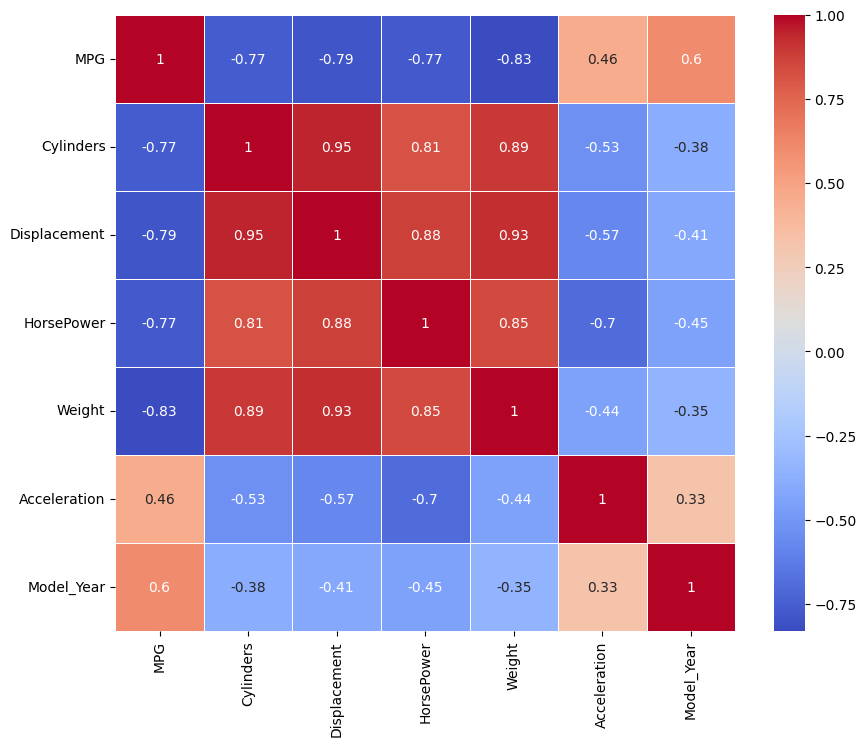

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

In [15]:
p.drop(columns=['Name','Origin','Model_Year'],inplace=True)

In [16]:
le = LabelEncoder()

In [17]:
X = pd.get_dummies(p.drop(columns=['car_type']), drop_first=True)
y = le.fit_transform(p['car_type'])
X

,MPG,Cylinders,Displacement,HorsePower,Weight,Acceleration
0,13.0,8.0,360.0,175.0,3821.0,11.0
1,15.0,8.0,390.0,190.0,3850.0,8.5
2,17.0,8.0,304.0,150.0,3672.0,11.5
3,24.3,4.0,151.0,90.0,3003.0,20.1
4,18.1,6.0,258.0,120.0,3410.0,15.1
...,...,...,...,...,...,...
295,43.1,4.0,90.0,48.0,1985.0,21.5
296,36.0,4.0,105.0,74.0,1980.0,15.3
297,31.5,4.0,89.0,71.0,1990.0,14.9
298,26.0,4.0,97.0,46.0,1950.0,21.0


In [18]:
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
model = LogisticRegression()

In [21]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
y_pred = model.predict(x_test)

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9777777777777777


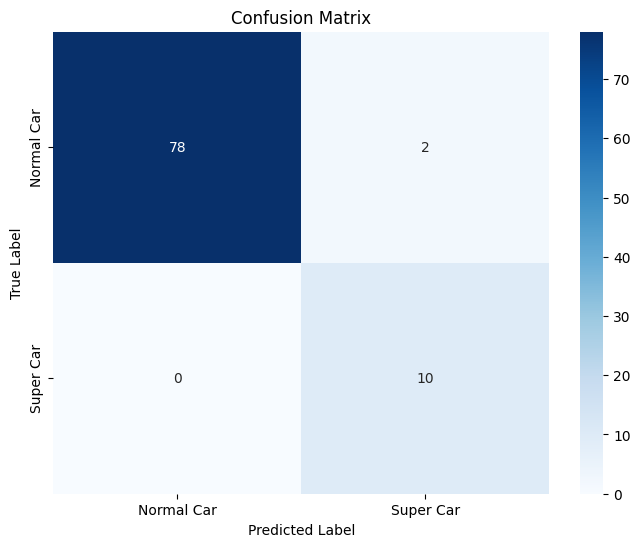

In [24]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        80
           1       0.83      1.00      0.91        10

    accuracy                           0.98        90
   macro avg       0.92      0.99      0.95        90
weighted avg       0.98      0.98      0.98        90

